In [3]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True

In [8]:

def f(u, a, b):
    return a*u/(1+b*u)

def Simualte(model, prms, traj=False, traj3d=False):
    t = np.linspace(0, prms['tmax'], int(prms['tn']))
    sol = odeint(model,prms['V0'], t, args=(prms,))
    
    if traj == True: 
        figts, axts = plt.subplots(3,sharex=True, figsize = (9,6))
        axts[0].plot(t[:], sol[:, 0], color='blue')
        axts[0].set_ylabel('$X(t)$')

        axts[1].plot(t[:], sol[:, 1], color='red')
        axts[1].set_ylabel('$Y(t)$')

        axts[2].plot(t[:], sol[:, 2], color='green')
        axts[2].set_ylabel('$Z(t)$')
        axts[2].set_xlabel('Time')
        
        figts.tight_layout()
        plt.show()
    else:
        None
    if traj3d == True:
        x, y, z = sol[:, 0], sol[:, 1], sol[:,2]
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x, y, z, color='blue', linewidth=1)
        ax.plot(0.8, 0.15, 9.9, color='red', markersize=5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        # ax.set_xlim(0,1)
        # ax.set_ylim(0,.5)
        # ax.set_zlim(7.5, 10.5)
        ax.grid(False)
        plt.show()
    return t, sol

# Hastings-Powell-0 Model
$$\begin{align} 
\dot{x} = & x(1-x) - f_1(x)y\\
\dot{y} = & f_1(x)y - f_2(y)z - d_1y\\
\dot{z} = & f_2(y)z -  d_2z \\
\end{align}$$
where:
$$  f_i(u) = \frac{a_iu}{1+b_iu}$$

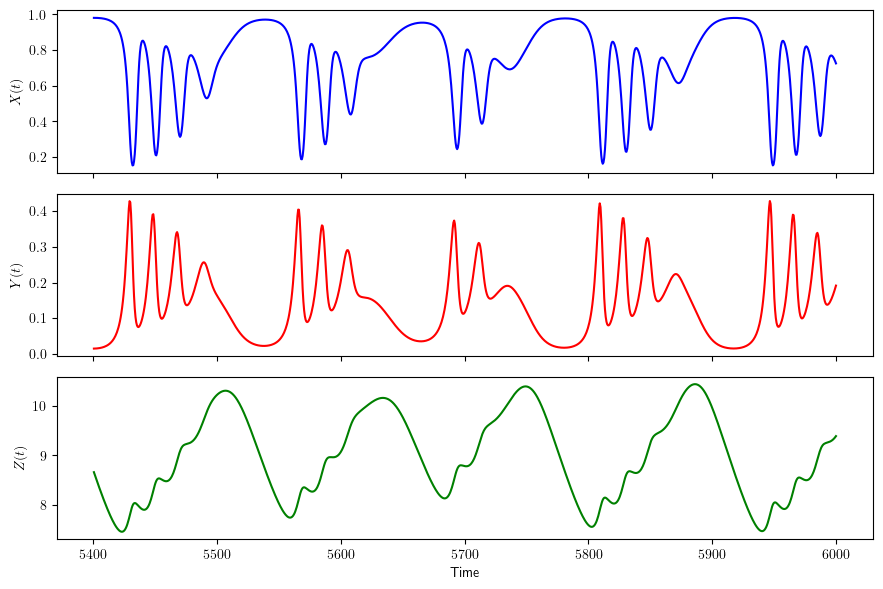

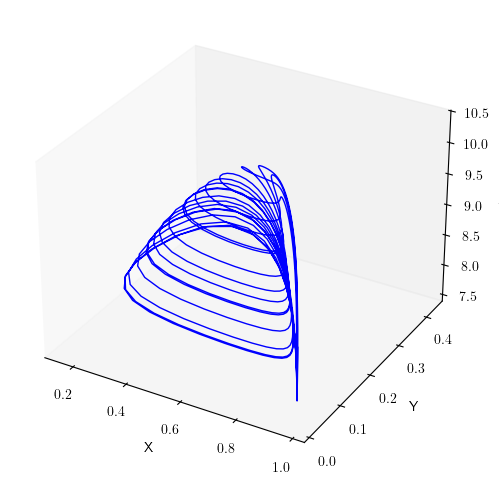

In [5]:
def HP0(V, t, prms):
    x,y,z = V
    dxdt = x*(1-x) - f(x, prms['a1'], prms['b1'])*y
    dydt = f(x, prms['a1'], prms['b1'])*y - f(y, prms['a2'], prms['b2'])*z - prms['dy']*y
    dzdt = f(y, prms['a2'], prms['b2'])*z - prms['dz']*z
    
    return [dxdt,dydt, dzdt]
    
HP0prm = {
    'a1':5,
    'b1':3,
    'a2':.1,
    'b2':2,
    'dy':.4,
    'dz':.01,
    'tmax':6000,
    'tn':1e4, 
    'V0':[.8, .15, 9.9]
}

t0, sol0 = Simualte(HP0, HP0prm, traj=True, traj3d=True)

# Hastings-Powell-1 Model
$$\begin{align} 
\dot{x} = & x(1-x) - f_1(x)y - f_3(x)z\\
\dot{y} = & f_1(x)y - f_2(y)z - d_yy\\
\dot{z} = & f_3(x)z + f_2(y)z -  d_zz \\
\end{align}$$
where:
$$  f_i(u) = \frac{a_iu}{1+b_iu}$$

C:\Users\aksha\AppData\Local\Temp\ipykernel_2956\3468885223.py:6: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(model,prms['V0'], t, args=(prms,))


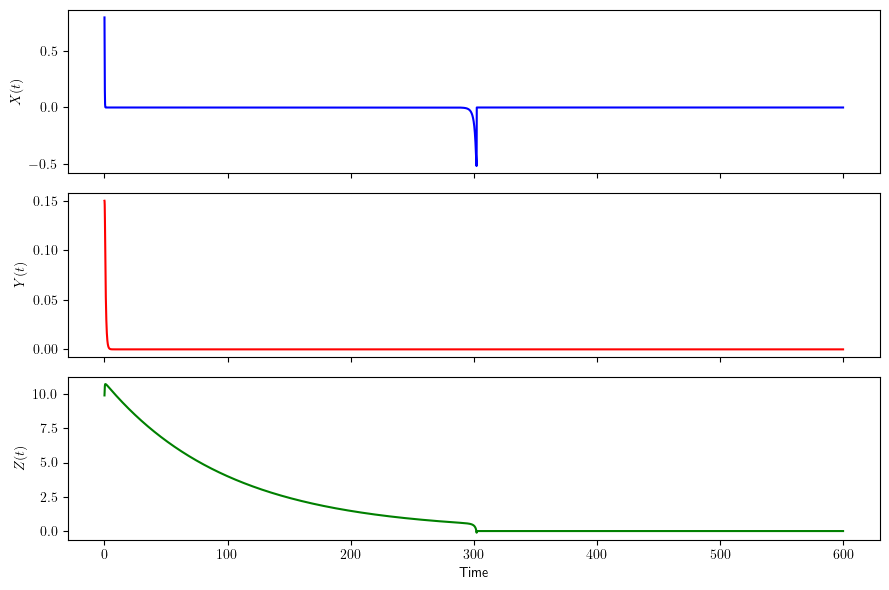

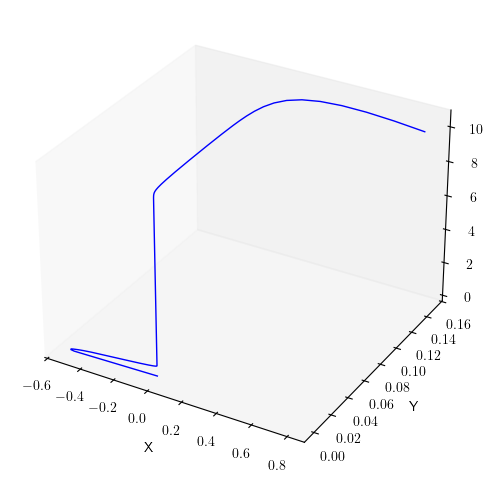

In [9]:

def HP1(V, t, prms):
    x,y,z = V
    dxdt = x*(1-x) - f(x, prms['a1'], prms['b1'])*y - f(x, prms['a3'], prms['b3'])*z
    dydt = f(x, prms['a1'], prms['b1'])*y - f(y, prms['a2'], prms['b2'])*z - prms['dy']*y
    dzdt =  f(x, prms['a3'], prms['b3'])*z + f(y, prms['a2'], prms['b2'])*z - prms['dz']*z
    
    return [dxdt,dydt, dzdt]
    
HP1prm = {
    'a1':5,
    'b1':3,
    'a2':.1,
    'b2':2,
    'a3':1,
    'b3':2,
    'dy':.4,
    'dz':.01,
    'tmax':600,
    'tn':1e4, 
    'V0':[.8, .15, 9.9]
}

t1, sol1 = Simualte(HP1, HP1prm, traj=True, traj3d=True)

# Hastings-Powell-2 Model
$$\begin{align} 
\dot{x} = & x(1-x) - f_1(x)y\\
\dot{y} = & f_1(x)y - f_2(y)z - d_1y\\
\dot{z} = & f_2(y)z -  d_2z \\
\end{align}$$
where:
$$  f_i(u) = \frac{a_iu}{1+b_iu}$$

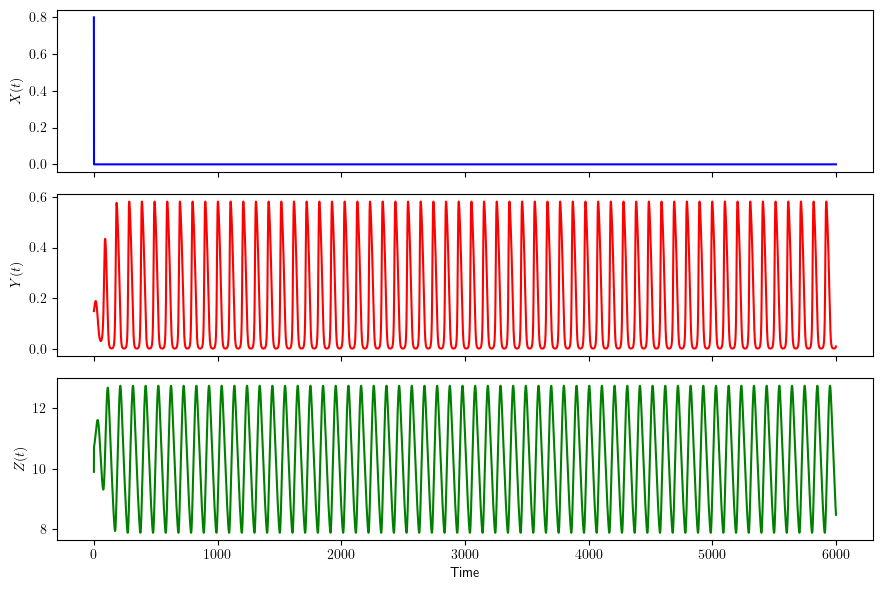

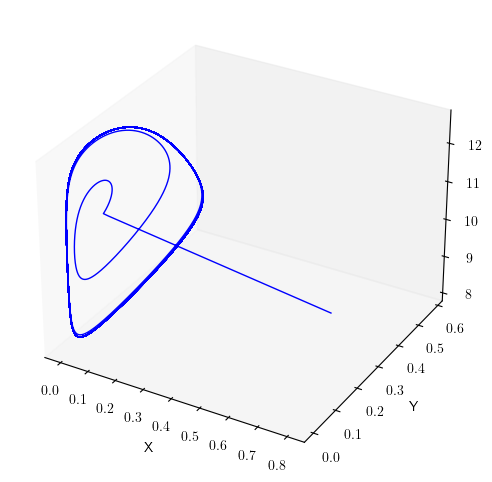

In [10]:
def f(u, a, b):
    return a*u/(1+b*u)
    
def HP2(V, t, prms):
    x,y,z = V
    dxdt = x*(1-x) - f(x, prms['a1'], prms['b1'])*z
    dydt = y*(1-y) - f(y, prms['a2'], prms['b2'])*z 
    dzdt = f(x, prms['a1'], prms['b1'])*z + f(y, prms['a2'], prms['b2'])*z  - prms['dz']*z
    
    return [dxdt,dydt, dzdt]
    
HP2prm = {
    'a1':5,
    'b1':3,
    'a2':.1,
    'b2':2,
    'dy':.4,
    'dz':.01,
    'tmax':6000,
    'tn':1e5, 
    'V0':[.8, .15, 9.9]
}

t2, sol2 = Simualte(HP2, HP2prm, traj=True, traj3d=True)

# Roughwork

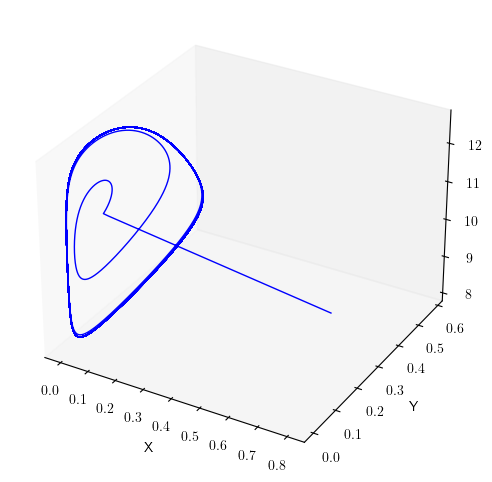

In [ ]:
x, y, z = sol2[:, 0], sol2[:, 1], sol2[:,2]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='blue', linewidth=1)
ax.plot(0.8, 0.15, 9.9, color='red', markersize=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
plt.show()

In [28]:
x, y, z = sol1[:, 0], sol1[:, 1], sol1[:,2]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='blue', linewidth=1)
ax.plot(0.8, 0.15, 9.9, color='red', markersize=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
plt.show()

NameError: name 'sol1' is not defined